# 학습목표
- CNN 알고리즘의 기본 원리를 이해 할 수 있다.
- keras를 이용해 CNN 모델을 구현 할 수 있다.

## 데이터 로드

In [1]:
# 현재 작업 디렉토리 확인
!pwd

/content


In [2]:
# 작업 디렉토리 이동
%cd "./drive/MyDrive/Colab Notebooks/딥러닝 기초 25.07.11 (class 2)"

/content/drive/MyDrive/Colab Notebooks/딥러닝 기초 25.07.11 (class 2)


In [6]:
# 현재 폴더 내부 확인
!ls

 data
'ex00_딥러닝 맛보기(동물분류).ipynb'
'ex01_딥러닝 맛보기(회귀, 머신러닝과 딥러닝 차이).ipynb'
'ex02_딥러닝 맛보기(이진 분류).ipynb'
'ex03_딥러닝 맛보기(다중분류, 콜백함수).ipynb'
'ex04_딥러닝 맛보기(CNN).ipynb'


In [3]:
# 데이터로드
import numpy as np
from tqdm import tqdm # 반복문 작업의 진척률을 알려주는 도구
from tensorflow.keras.utils import image_dataset_from_directory # 폴더로부터 이미지를 읽어주는 도구

In [4]:
# 2. 데이터 로딩
train_data = image_dataset_from_directory(
  directory = "./data/animal", # 읽어들일 경로
  labels = "inferred", # 폴더명을 인식해서 사진마다 정답으로 붙여준다
  label_mode = "categorical", # 다중분류 정답 형태로 붙여줘라
  color_mode = 'rgb', # 컬러 색상체계로 읽어줘라
  image_size = (224,224) # 입력한 사진 크기에 맞춰 리사이징
)

Found 2500 files belonging to 5 classes.


In [5]:
# 훈련용 데이터가 저장될 리스트 생성
X_train = []
y_train = []

In [6]:
# 반복문을 이용해서 데이터(문제,정답) 읽기
for img, label in tqdm(train_data.as_numpy_iterator()) :
  X_train.append(img) # 32장씩 이미지를 리스트에 저장
  y_train.append(label) # 32개 정답데이터를 리스트에 저장

79it [12:13,  9.28s/it]


In [7]:
# 리스트에 담겨있는(32개씩 묶음) 데이터를 하나의 넘파이로 통합
X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train)

In [8]:
# 데이터 모양 확인
X_train.shape, y_train.shape

((2500, 224, 224, 3), (2500, 5))

## MLP 모델링 (ex03 참고)
- 입력층, 중간층, 출력층 설계
- 모델학습 방법 설정 (loss, optimizer, metrics)
- 모델학습 및 히스토리 확인
- (옵션) 콜백함수 넣기

In [9]:
# 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten

# Flatten : 다차원의 구조를 1D(Dense의 입력)으로 변환

In [11]:
mlp_model = Sequential() # 모델의 뼈대 생성

# 입력층
mlp_model.add(InputLayer(shape=(224,224,3)))

# 은닉층(중간층)
mlp_model.add(Flatten()) # 3차원 이미지를 1차원으로 변경
mlp_model.add(Dense(128, activation='relu'))
mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(Dense(512, activation='relu'))
mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(Dense(128, activation='relu'))

# 출력층
mlp_model.add(Dense(5, activation='softmax'))

In [12]:
# 모델학습 방법 및 평가방법 설정
mlp_model.compile(loss="categorical_crossentropy", # 다중분류용 오차를 구하는 함수
                  optimizer="Adam", # 오차를 기반으로 업데이트 방향설정(기울기)
                  metrics=['accuracy'])

In [13]:
# 모델학습
mlp_h = mlp_model.fit(X_train,
                      y_train,
                      validation_split=0.2,
                      epochs=20)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.2131 - loss: 2453.0815 - val_accuracy: 0.2060 - val_loss: 2.6245
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2100 - loss: 1.8675 - val_accuracy: 0.1840 - val_loss: 1.6104
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1938 - loss: 1.6094 - val_accuracy: 0.1840 - val_loss: 1.6106
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1917 - loss: 1.6092 - val_accuracy: 0.1720 - val_loss: 1.6111
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2003 - loss: 1.6089 - val_accuracy: 0.1720 - val_loss: 1.6115
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.2028 - loss: 1.6091 - val_accuracy: 0.1720 - val_loss: 1.6119
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.2069 - loss: 1.6084 - val_accuracy: 0.1720 - val_loss: 1.6123
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1961 - loss: 1.6092 - val_accuracy: 0.172

## CNN 모델링

In [15]:
from tensorflow.keras.layers import Conv2D # 이미지의 특징을 강조하는 레이어 (이미지 커널 연산)
from tensorflow.keras.layers import MaxPooling2D # 불필요한 정보를 삭제

In [16]:
CNN_model = Sequential() # 모델의 뼈대 생성

# 입력층
CNN_model.add(InputLayer(shape=(224,224,3)))

# 은닉층(중간층)
## part 1 : 특성 추출부
CNN_model.add(Conv2D(filters=64, # 특성을 추출하기 위한 필터의 갯수(특성의 수)
                     kernel_size = (3,3), # 연산이 실행되는 커널의 크기
                     activation='relu')) # 활성화 함수
CNN_model.add(MaxPooling2D()) # 불필요한 정보 삭제

CNN_model.add(Conv2D(filters=128, # 특성을 추출하기 위한 필터의 갯수(특성의 수)
                     kernel_size = (3,3), # 연산이 실행되는 커널의 크기
                     activation='relu')) # 활성화 함수
CNN_model.add(MaxPooling2D()) # 불필요한 정보 삭제

CNN_model.add(Conv2D(filters=64, # 특성을 추출하기 위한 필터의 갯수(특성의 수)
                     kernel_size = (3,3), # 연산이 실행되는 커널의 크기
                     activation='relu')) # 활성화 함수
CNN_model.add(MaxPooling2D()) # 불필요한 정보 삭제

## part 2 : 분류기
CNN_model.add(Flatten()) # 3차원 이미지를 1차원으로 변경
CNN_model.add(Dense(128, activation='relu'))
CNN_model.add(Dense(256, activation='relu'))
CNN_model.add(Dense(512, activation='relu'))
CNN_model.add(Dense(256, activation='relu'))
CNN_model.add(Dense(128, activation='relu'))

# 출력층
CNN_model.add(Dense(5, activation='softmax'))

In [17]:
# 모델학습 방법 및 평가방법 설정
CNN_model.compile(loss="categorical_crossentropy", # 다중분류용 오차를 구하는 함수
                  optimizer="Adam", # 오차를 기반으로 업데이트 방향설정(기울기)
                  metrics=['accuracy'])

In [18]:
# 모델학습
CNN_h = CNN_model.fit(X_train,
                      y_train,
                      validation_split=0.2,
                      epochs=20)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 343ms/step - accuracy: 0.2054 - loss: 14.5213 - val_accuracy: 0.2100 - val_loss: 1.6061
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.2462 - loss: 1.6011 - val_accuracy: 0.2220 - val_loss: 1.6023
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.3024 - loss: 1.5340 - val_accuracy: 0.2400 - val_loss: 1.6096
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.4101 - loss: 1.3942 - val_accuracy: 0.2860 - val_loss: 1.7426
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.5570 - loss: 1.1094 - val_accuracy: 0.2560 - val_loss: 1.9648
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.6623 - loss: 0.8798 - val_accuracy: 0.2840 - val_loss: 2.6148
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.7393 - loss: 0.7387 - val_accuracy: 0.2740 - val_loss: 3.3426
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.7706 - loss: 0.6507 - val_accuracy: 0.2

## 학습결과 비교

In [19]:
import matplotlib.pyplot as plt

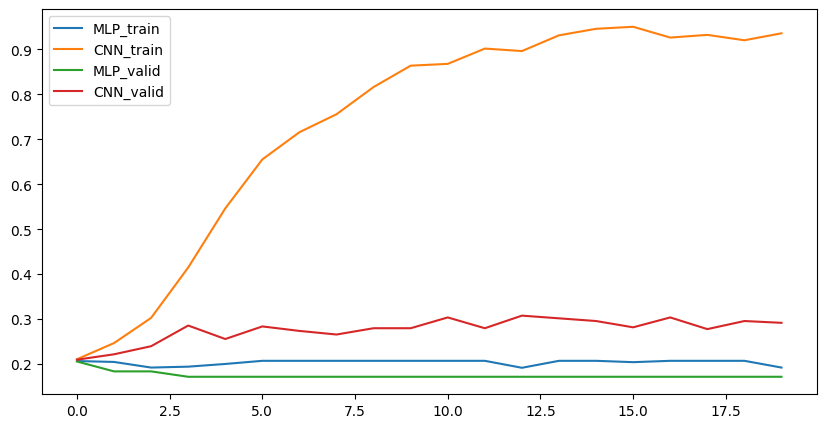

In [20]:
plt.figure(figsize=(10,5))

# 훈련용 정확도
plt.plot(mlp_h.history['accuracy'], label='MLP_train')
plt.plot(CNN_h.history['accuracy'], label='CNN_train')
# 검증용 정확도
plt.plot(mlp_h.history['val_accuracy'], label='MLP_valid')
plt.plot(CNN_h.history['val_accuracy'], label='CNN_valid')

plt.legend()
plt.show()

## 과제
- 현재 CNN 모델의 특성추출부에서 필터의 수, 커널의 사이즈, Conv레이어의 숫자 등을 변경하면서 기존 성능보다 개선된 모델을 만들어보자.
- 기존성능이 30%라면 33%, 40% 등 조금이라도 더 높아지는 구조를 찾아보기